In [1]:
import json
import string
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Input, Embedding, LSTM , Dense,GlobalMaxPooling1D,Flatten
from tensorflow.keras.models import Model 
import pickle

In [2]:
with open("data-chatbot.json") as data_file:
    data1 = json.load(data_file)

In [3]:
text_input = []
intents = []
responses={}

for intent in data1['intents']:
    responses[intent['tag']] = intent['responses']
    for pattern in intent['patterns']:
        text_input.append(pattern)
        intents.append(intent['tag'])

df = pd.DataFrame({'text_input': text_input,
                    'intents': intents})

data = df
data.shape
print(responses)

{'cara menanam buah naga': ['Untuk menanam buah naga dengan baik, pastikan Anda memilih lokasi yang mendapat sinar matahari penuh, memiliki tanah yang subur dan drainase yang baik. Persiapkan tanah dengan mencampurkan kompos atau pupuk organik, kemudian tanam bibit buah naga dengan jarak yang cukup antara satu dengan yang lain. Berikan penyiraman secara teratur, dan pastikan untuk memberikan dukungan kepada tanaman yang memerlukan.', 'Untuk menanam buah naga, pertama-tama, Anda perlu memilih lokasi yang terkena sinar matahari penuh dan memiliki drainase yang baik. Kemudian, persiapkan tanah dengan mencampurkan kompos atau pupuk organik untuk meningkatkan kesuburan tanah. Setelah itu, tanamlah bibit buah naga dengan jarak yang sesuai, dan berikan penyiraman secara teratur. Jangan lupa untuk memberikan dukungan seperti tiang atau trellis untuk tanaman yang tumbuh merambat.', 'Langkah pertama dalam menanam buah naga adalah memilih lokasi yang sesuai. Pastikan lokasi tersebut terkena sinar

In [4]:
print(intents)

['cara menanam buah naga', 'cara menanam buah naga', 'cara menanam buah naga', 'cara menanam buah naga', 'cara menanam buah naga', 'persiapan lahan buah naga', 'persiapan lahan buah naga', 'persiapan lahan buah naga', 'persiapan lahan buah naga', 'persiapan lahan buah naga', 'tanam buah naga dari biji vs stek', 'tanam buah naga dari biji vs stek', 'tanam buah naga dari biji vs stek', 'tanam buah naga dari biji vs stek', 'jarak tanam buah naga', 'jarak tanam buah naga', 'jarak tanam buah naga', 'jarak tanam buah naga', 'merawat tanaman buah naga', 'merawat tanaman buah naga', 'merawat tanaman buah naga', 'merawat tanaman buah naga', 'merawat tanaman buah naga', 'hama dan penyakit buah naga', 'hama dan penyakit buah naga', 'hama dan penyakit buah naga', 'hama dan penyakit buah naga', 'waktu memanen buah naga', 'waktu memanen buah naga', 'waktu memanen buah naga', 'waktu memanen buah naga', 'varietas buah naga', 'varietas buah naga', 'varietas buah naga', 'varietas buah naga', 'pupuk buah

In [5]:
data['text_input'] = data['text_input'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['text_input'] = data['text_input'].apply(lambda wrd: ''.join(wrd))
data['intents'] = data['intents'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['intents'] = data['intents'].apply(lambda wrd: ''.join(wrd))

In [6]:
pickle.dump(data['text_input'],open('texts.pkl','wb')) 
pickle.dump(data['intents'],open('labels.pi','wb'))

In [7]:
data

,text_input,intents
0,bagaimana cara menanam buah naga,cara menanam buah naga
1,langkahlangkah menanam buah naga,cara menanam buah naga
2,cara menanam buah naga yang baik,cara menanam buah naga
3,prosedur menanam buah naga,cara menanam buah naga
4,apa langkahlangkahnya untuk menanam buah naga,cara menanam buah naga
...,...,...
244,kapan waktu terbaik untuk panen padi,waktu memanen padi
245,kapan panen padi dilakukan,waktu memanen padi
246,apa yang harus dilakukan jika tanaman padi men...,penanganan kekurangan unsur hara pada padi
247,bagaimana cara mengatasi kekurangan unsur hara...,penanganan kekurangan unsur hara pada padi


In [8]:
tokenizer = Tokenizer(num_words = 1000, oov_token="<OOV>")
tokenizer.fit_on_texts(data['text_input'])
training_sequence = tokenizer.texts_to_sequences(data['text_input'])

x_train = pad_sequences(training_sequence, maxlen=10,
                                padding='post', truncating='post')

le = LabelEncoder()
y_train = le.fit_transform(data['intents'])

In [9]:
input_shape = x_train.shape[1]
print(input_shape)

vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)

output_length = le.classes_.shape[0]
print("output length: ",output_length)

10
number of unique words :  292
output length:  73


In [10]:
i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)
model  = Model(i,x)

model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

train = model.fit(x_train,y_train,epochs=200)

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.0155 - loss: 4.2901   
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0743 - loss: 4.2857  
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1145 - loss: 4.2822 
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1221 - loss: 4.2771
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1367 - loss: 4.2715 
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1490 - loss: 4.2622
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1839 - loss: 4.2488 
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1590 - loss: 4.2321
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1836 - loss: 4.2013
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1783 - loss: 4.1638
Epoch 11/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1828 - loss: 4.0943
Epoch 12/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1734 - loss

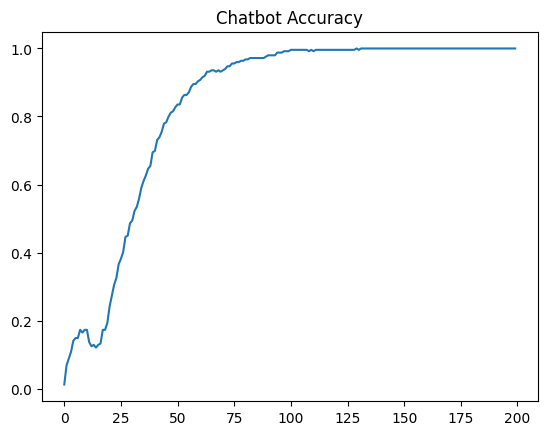

In [11]:
import matplotlib.pyplot as plt
model_history = train.history
accuracy = model_history['accuracy']
plt.figure()
plt.plot(accuracy, label='Accuracy')
plt.title('Chatbot Accuracy')
plt.show()

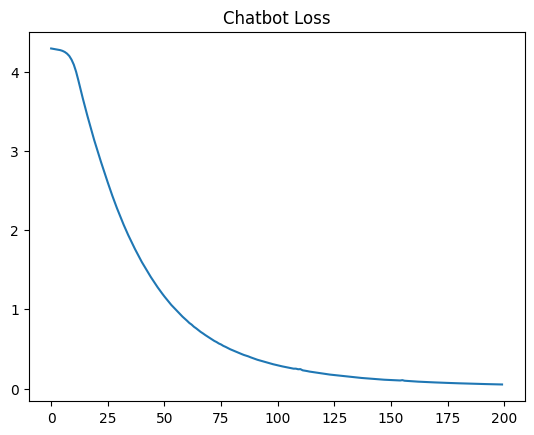

In [14]:
loss = model_history['loss']
plt.figure()
plt.plot(loss, label='Loss')
plt.title('Chatbot Loss')
plt.show()


In [12]:
model.save('models.h5', train)
with open('tokenizer.json', 'w') as f:
    f.write(tokenizer.to_json())

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('label_encoder.pickle', 'wb') as handle:
    pickle.dump(le, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [13]:
import random

while True:
  texts_p = []
  prediction_input = input('You : ')
  print(prediction_input)
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  print(prediction_input)
  prediction_input = ''.join(prediction_input)
  print(prediction_input)
  texts_p.append(prediction_input)
  print(prediction_input)

  prediction_input = tokenizer.texts_to_sequences(texts_p)
  print(prediction_input)
  prediction_input = np.array(prediction_input).reshape(-1)
  print(prediction_input)
  prediction_input = pad_sequences([prediction_input], maxlen=10,
                                padding='post', truncating='post')
  print(prediction_input)

  output = model.predict(prediction_input)
  output = output.argmax()

  response_tag = le.inverse_transform([output])[0]
  print("Dokter AI : ",random.choice(responses[response_tag]))
  if response_tag == "goodbye":
    break


[]


[[]]
[]
[[0 0 0 0 0 0 0 0 0 0]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


KeyError: 'peluangusahajagung'